# Chaos Theory

https://en.wikipedia.org/wiki/Chaos_theory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.831596,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.824478,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.014095,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.481071,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.326992,82271200


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.326317,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.814045,234330000
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.568638,212468400
2018-12-28,39.375000,39.630001,38.637501,39.057499,37.587891,169165600
2018-12-31,39.632500,39.840000,39.119999,39.435001,37.951187,140014000


In [4]:
# Extract closing prices and calculate log returns
closing_prices = df["Adj Close"]
log_returns = np.log(closing_prices / closing_prices.shift(1))

In [5]:
# Generate chaotic time series
t = np.arange(len(log_returns))
x = np.zeros(len(t))
x[0] = 0.1  # initial condition
r = 3.8  # chaos parameter
for i in range(1, len(t)):
    x[i] = r * x[i-1] * (1 - x[i-1])

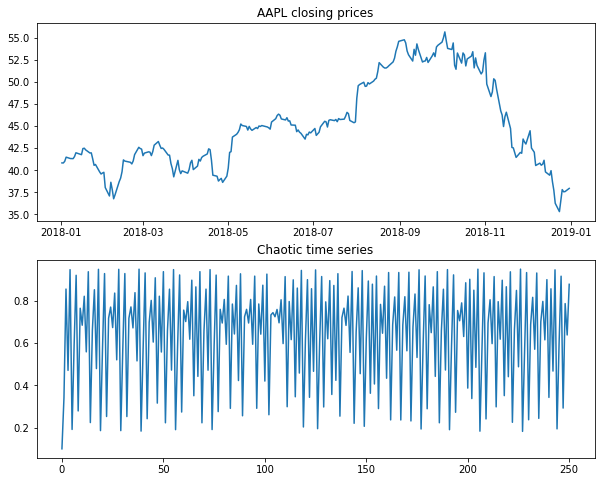

In [6]:
# Plot the data
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(closing_prices)
ax[0].set_title(f"{symbol} closing prices")
ax[1].plot(t, x)
ax[1].set_title("Chaotic time series")
plt.show()

Text(0.5, 0, 't')

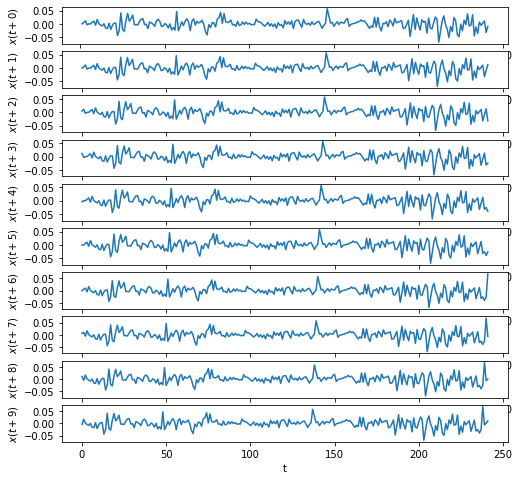

In [7]:
# Define the parameters for the chaos theory analysis
tau = 10
n = len(log_returns)
delay = 1

# Create the delay embedding vectors
embedding_vectors = np.zeros((n - (tau - 1) * delay, tau))
for i in range(0, n - (tau - 1) * delay):
    embedding_vectors[i] = log_returns[i:i + (tau - 1) * delay + 1:delay]

# Plot the delay embedding vectors
plt.figure(figsize=(8, 8))
for i in range(tau):
    plt.subplot(tau, 1, i+1)
    plt.plot(embedding_vectors[:, i])
    plt.ylabel(f"$x(t+{i*delay})$")
plt.xlabel("t")